In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import datatree as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim
from tcpips.constants import DATA_PATH, FIGURE_PATH
from adforce.mesh import xr_loader

plot_defaults()

In [3]:
station_nc = xr_loader("../../kat.nws13.2004/fort.61.nc")
station_nc

/work/n01/n01/sithom/miniconda3/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


'xr_loader'  4.68794 s 



<xarray.Dataset>
Dimensions:       (time: 1344, station: 83)
Coordinates:
  * time          (time) datetime64[ns] 2004-08-01T00:15:00 ... 2004-08-15
Dimensions without coordinates: station
Data variables:
    station_name  (station) |S50 ...
    x             (station) float64 ...
    y             (station) float64 ...
    zeta          (time, station) float64 ...
Attributes: (12/50)
    _FillValue:         -99999.0
    dry_Value:          -99999.0
    model:              ADCIRC
    version:            1060562
    grid_type:          Triangular
    description:        ﻿ASGS      ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [4]:
met_stat = xr_loader("../../kat.nws13.2004/fort.71.nc")
met_stat

'xr_loader'  11.00025 s 



<xarray.Dataset>
Dimensions:       (time: 336, station: 83)
Coordinates:
  * time          (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-15
Dimensions without coordinates: station
Data variables:
    station_name  (station) |S50 ...
    x             (station) float64 ...
    y             (station) float64 ...
    pressure      (time, station) float64 ...
Attributes: (12/50)
    _FillValue:         -99999.0
    dry_Value:          -99999.0
    model:              ADCIRC
    version:            1060562
    grid_type:          Triangular
    description:        ﻿ASGS      ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [5]:
met_stat = xr_loader("../../kat.nws13.2004/fort.71.nc", use_dask=True)
met_stat

'xr_loader'  6.17040 s 



<xarray.Dataset>
Dimensions:       (time: 336, station: 83)
Coordinates:
  * time          (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-15
Dimensions without coordinates: station
Data variables:
    station_name  (station) |S50 dask.array<chunksize=(83,), meta=np.ndarray>
    x             (station) float64 dask.array<chunksize=(83,), meta=np.ndarray>
    y             (station) float64 dask.array<chunksize=(83,), meta=np.ndarray>
    pressure      (time, station) float64 dask.array<chunksize=(1, 83), meta=np.ndarray>
Attributes: (12/50)
    _FillValue:         -99999.0
    dry_Value:          -99999.0
    model:              ADCIRC
    version:            1060562
    grid_type:          Triangular
    description:        ﻿ASGS      ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [6]:
met_stat = xr_loader("../../kat.nws13.2004/fort.72.nc", use_dask=True)
met_stat

'xr_loader'  3.21059 s 



<xarray.Dataset>
Dimensions:       (time: 336, station: 83)
Coordinates:
  * time          (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-15
Dimensions without coordinates: station
Data variables:
    station_name  (station) |S50 dask.array<chunksize=(83,), meta=np.ndarray>
    x             (station) float64 dask.array<chunksize=(83,), meta=np.ndarray>
    y             (station) float64 dask.array<chunksize=(83,), meta=np.ndarray>
    windx         (time, station) float64 dask.array<chunksize=(1, 83), meta=np.ndarray>
    windy         (time, station) float64 dask.array<chunksize=(1, 83), meta=np.ndarray>
Attributes: (12/50)
    _FillValue:         -99999.0
    dry_Value:          -99999.0
    model:              ADCIRC
    version:            1060562
    grid_type:          Triangular
    description:        ﻿ASGS      ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [8]:
station_nc

<xarray.Dataset>
Dimensions:       (time: 1344, station: 83)
Coordinates:
  * time          (time) datetime64[ns] 2004-08-01T00:15:00 ... 2004-08-15
Dimensions without coordinates: station
Data variables:
    station_name  (station) |S50 ...
    x             (station) float64 ...
    y             (station) float64 ...
    zeta          (time, station) float64 ...
Attributes: (12/50)
    _FillValue:         -99999.0
    dry_Value:          -99999.0
    model:              ADCIRC
    version:            1060562
    grid_type:          Triangular
    description:        ﻿ASGS      ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

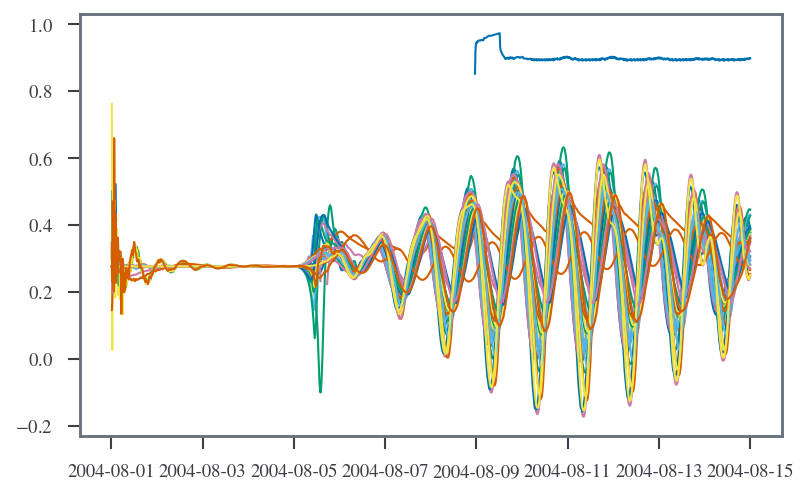

In [9]:
plt.plot(station_nc.time.values, station_nc.zeta.values)

In [10]:
from adforce.mesh import select_coast_mesh, select_coast, plot_contour
f63 = xr_loader("../../kat.nws13.2004/fort.63.nc")
indices, adj = select_coast(f63, overtopping=True, keep_sparse=True)
f63_coast = f63.isel(node=indices)
x_values, y_values = f63_coast.x.values, f63_coast.y.values

'xr_loader'  0.65731 s 

'calculate_adjacency_matrix'  0.29477 s 

'select_coast'  1.38119 s 



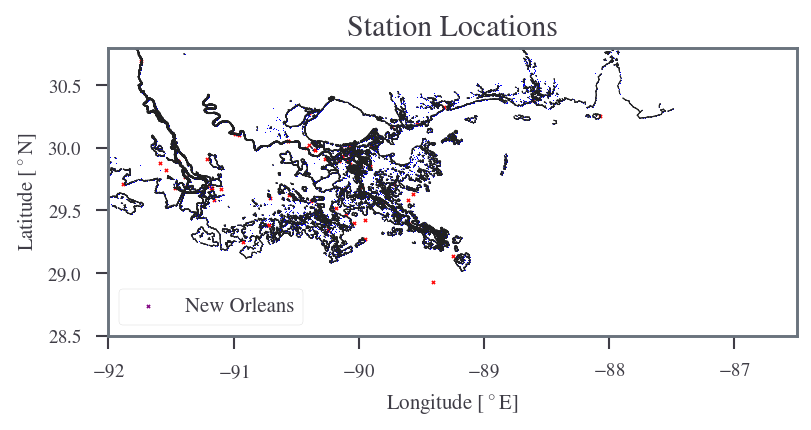

In [11]:
from src.constants import NEW_ORLEANS, NO_BBOX
from adforce.mesh import select_coast_mesh, select_coast, plot_contour
ax = plt.gca()
plot_contour(ax.gca(), x_values, y_values, adj)
plt.scatter(station_nc.x.values, station_nc.y.values, s=3, color="red", label="Station")
plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat, c="purple", s=3, label="New Orleans")
plt.xlabel("Longitude [$^\circ$E]")
plt.ylabel("Latitude [$^\circ$N]")
plt.title("Station Locations")
plt.legend()
NO_BBOX.ax_lim(ax.gca())
ax.set_aspect("equal")

In [ ]:
from adforce.fort22 import read_fort22

In [ ]:
read_fort22("../../kat.nws13.2004/fort.22.nc")

DataTree('None', parent=None)
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes:
│       group_order:  Main TC1
│       institution:  Oceanweather Inc. (OWI)
│       conventions:  CF-1.6 OWI-NWS13
├── DataTree('Main')
│       Dimensions:  (time: 673, yi: 385, xi: 393)
│       Coordinates:
│           lon      (yi, xi) float64 ...
│           lat      (yi, xi) float64 ...
│         * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-16
│       Dimensions without coordinates: yi, xi
│       Data variables:
│           PSFC     (time, yi, xi) float32 ...
│           U10      (time, yi, xi) float32 ...
│           V10      (time, yi, xi) float32 ...
│       Attributes:
│           rank:     1
└── DataTree('TC1')
        Dimensions:  (time: 481, yi: 161, xi: 161)
        Coordinates:
            lon      (time, yi, xi) float64 ...
            lat      (time, yi, xi) float64 ...
          * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-14
        Dimensions without coordinates: yi, xi
        Data variables:
            clon     (time) float64 ...
            clat     (time) float64 ...
            PSFC     (time, yi, xi) float32 ...
            U10      (time, yi, xi) float32 ...
            V10      (time, yi, xi) float32 ...
        Attributes:
            rank:     2

In [ ]:
f22 = read_fort22("../../kat.nws13.2004/fort.22.nc")

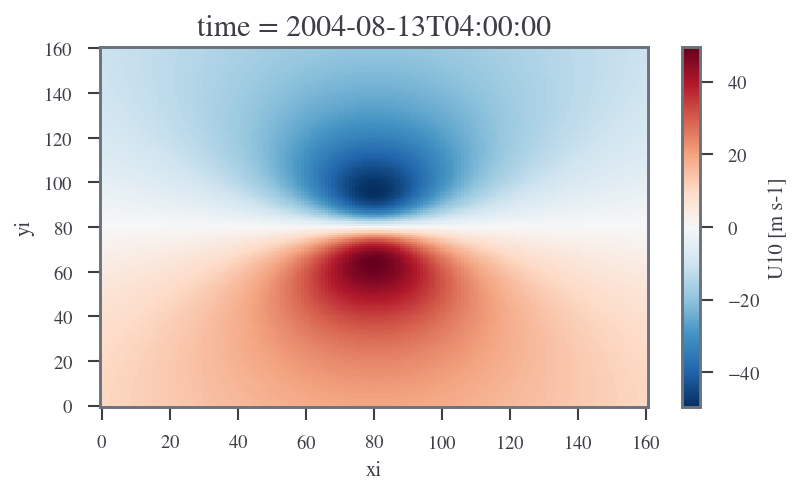

In [ ]:
f22["TC1"]["U10"].isel(time=400).plot()

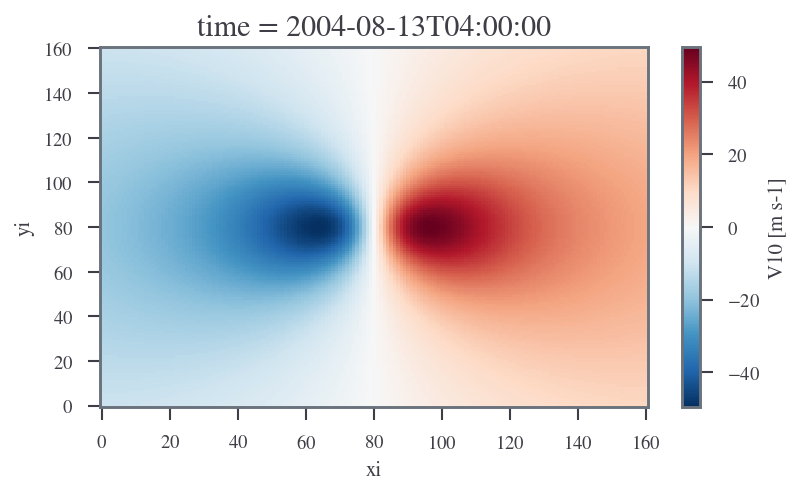

In [ ]:
f22["TC1"]["V10"].isel(time=400).plot()

In [ ]:
from src.constants import NO_BBOX
import pandas as pd
from sithom.plot import plot_defaults, lim
from sithom.xr import plot_units
from adforce.mesh import bbox_mesh

plot_defaults()

def plot_quiver_height(path_in: str = "mult1", time_i: int = 160, x_pos: float = 0.95, y_pos: float = -0.15) -> None:
    """
    Plot quiver height.

    Args:
        path_in (str, optional): name of data folder. Defaults to "mult1".
        time_i (int, optional): time_i. Defaults to 185.
    """
    # path_in = os.path.join(DATA_PATH, path_in)
    ds = bbox_mesh(os.path.join(path_in, "fort.63.nc"), bbox=NO_BBOX.pad(0.3), use_dask=True)
    print(ds)
    vmin, vmax = ds.zeta.min().values, ds.zeta.max().values
    vmin, vmax = np.min([-vmax, vmin]), np.max([-vmin, vmax])
    print(vmin, vmax)
    levels = np.linspace(vmin, vmax, num=400)
    cbar_levels = np.linspace(vmin, vmax, num=5)
    plt.tricontourf(
            ds.x.values,
            ds.y.values,
            ds.element.values -1,
            np.nan_to_num(ds.zeta.isel(time=time_i).values,copy=False, nan=0),
            vmin=vmin,
            vmax=vmax,
            levels=levels,
            cmap="cmo.balance",
        )
    ax = plt.gca()
    cbar = plt.colorbar(label="Height [m]")
    cbar.set_ticks(cbar_levels)
    cbar.set_ticklabels(["{:.2f}".format(x) for x in cbar_levels.tolist()])
    plt.xlabel("Longitude [$^{\circ}$E]")
    plt.ylabel("Latitude [$^{\circ}$N]")
    time = ds.isel(time=time_i).time.values
    ts = pd.to_datetime(str(time))
    print(ts)
    # plt.savefig(os.path.join(output_path, str(time_i) + ".png"))
    # plt.clf()
    ds = read_fort22(os.path.join(path_in, "fort.22.nc"))["Main"].to_dataset()
    print(ds)
    quiver = plot_units(
        ds.sel(time=time, method="nearest"), 
        x_dim="lon", 
        y_dim="lat"
    ).plot.quiver(
        ax=ax,
        x="lon",
        y="lat",
        u="U10",
        v="V10",
        add_guide=False,
    )
    _ = plt.quiverkey(
        quiver,
        # 1.08,
        x_pos,
        y_pos,  # 08,
        40,
        str(r"$40$ m s$^{-1}$"),  # + "\n"
        labelpos="E",
        coordinates="axes",
        # coordinates="figure"
    )
    NO_BBOX.ax_lim(plt.gca())
    plt.title(ts.strftime("%Y-%m-%d  %H:%M"))
    # plt.savefig(os.path.join(FIGURE_PATH, "example_colision.png"))
    # plt.clf()

'xr_loader'  0.14577 s 

'filter_mesh'  0.55997 s 

'bbox_mesh'  3.01443 s 

<xarray.Dataset>
Dimensions:      (time: 336, node: 233971, mesh: 1, nope: 2, neta: 122,
                  nbou: 15, nvel: 8316, nele: 465356, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-15
    x            (node) float64 dask.array<chunksize=(233971,), meta=np.ndarray>
    y            (node) float64 dask.array<chunksize=(233971,), meta=np.ndarray>
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nvdll        (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    max_nvdll    int32 ...
    ibtypee      (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    nbdv         (neta) int32 dask.array<chunksize=(122,), meta=np.ndarray>
    nvell        (nbou) int32 dask.array<chunksize=(15,), meta=n

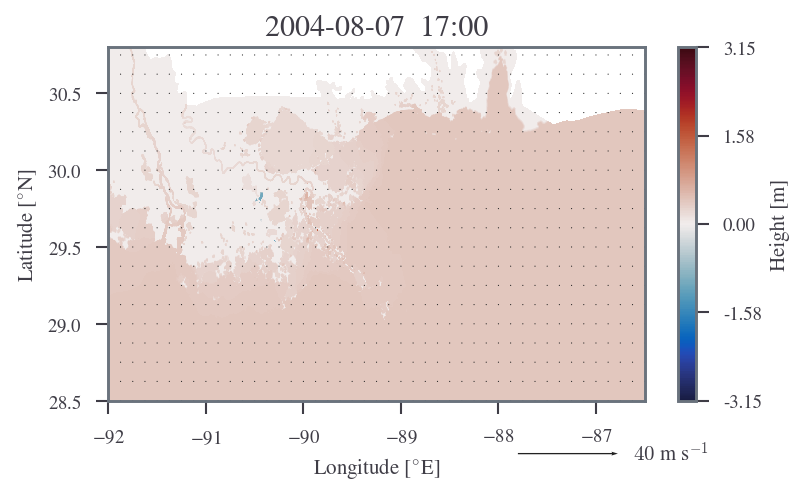

In [ ]:
plot_quiver_height("../../kat.nws13.2004")

'xr_loader'  0.16771 s 

'filter_mesh'  0.60725 s 

'bbox_mesh'  0.79428 s 

<xarray.Dataset>
Dimensions:      (time: 168, node: 233971, mesh: 1, nope: 2, neta: 122,
                  nbou: 15, nvel: 8316, nele: 465356, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-29T01:00:00 ... 2014-05-06
    x            (node) float64 dask.array<chunksize=(233971,), meta=np.ndarray>
    y            (node) float64 dask.array<chunksize=(233971,), meta=np.ndarray>
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nvdll        (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    max_nvdll    int32 ...
    ibtypee      (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    nbdv         (neta) int32 dask.array<chunksize=(122,), meta=np.ndarray>
    nvell        (nbou) int32 dask.array<chunksize=(15,), meta=n

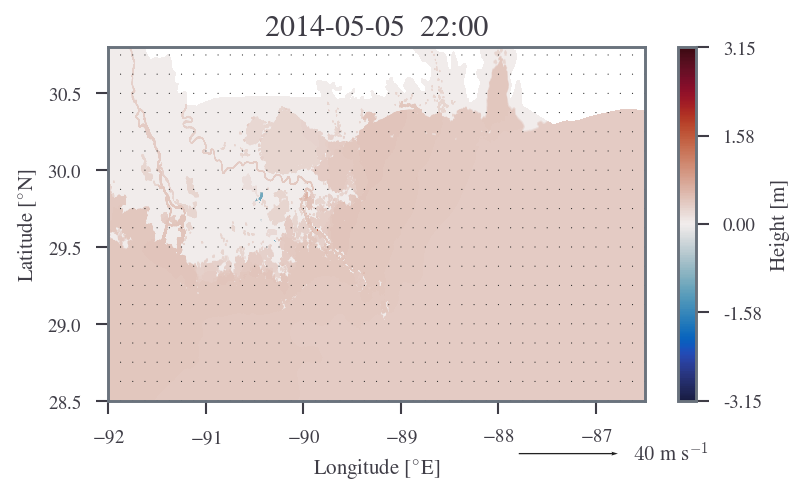

In [ ]:
plot_quiver_height("../../kat.nws13", time_i=165)

'xr_loader'  4.04949 s 

'filter_mesh'  1.15848 s 

'bbox_mesh'  6.14230 s 

<xarray.Dataset>
Dimensions:      (time: 336, node: 233971, mesh: 1, nope: 2, neta: 122,
                  nbou: 15, nvel: 8316, nele: 465356, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-15
    x            (node) float64 dask.array<chunksize=(233971,), meta=np.ndarray>
    y            (node) float64 dask.array<chunksize=(233971,), meta=np.ndarray>
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nvdll        (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    max_nvdll    int32 ...
    ibtypee      (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    nbdv         (neta) int32 dask.array<chunksize=(122,), meta=np.ndarray>
    nvell        (nbou) int32 dask.array<chunksize=(15,), meta=n

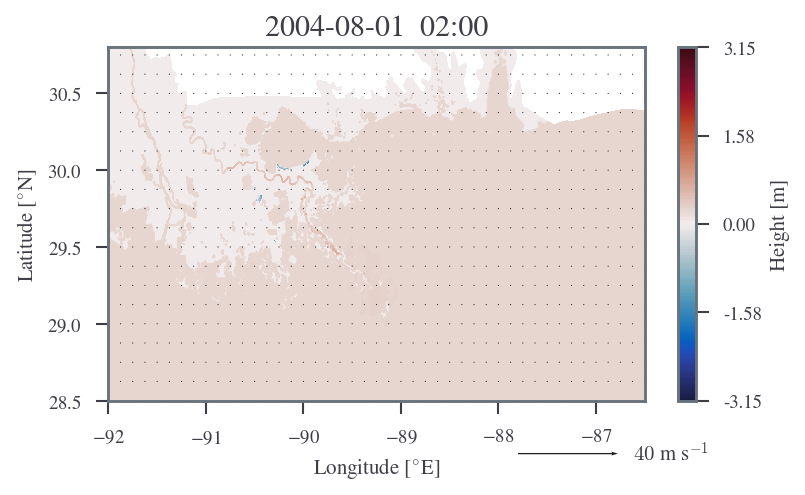

In [ ]:
plot_quiver_height("../../kat.nws13.2004", time_i=1)

In [ ]:
ds = bbox_mesh(os.path.join("../../kat.nws13.2004", "fort.63.nc"), bbox=NO_BBOX)

'xr_loader'  0.09404 s 

'filter_mesh'  0.51246 s 

'bbox_mesh'  0.62801 s 



'xr_loader'  0.01540 s 

'filter_mesh'  0.50047 s 

'bbox_mesh'  0.52094 s 

<xarray.Dataset>
Dimensions:      (time: 336, node: 233971, mesh: 1, nope: 2, neta: 122,
                  nbou: 15, nvel: 8316, nele: 465356, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-15
    x            (node) float64 dask.array<chunksize=(233971,), meta=np.ndarray>
    y            (node) float64 dask.array<chunksize=(233971,), meta=np.ndarray>
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nvdll        (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    max_nvdll    int32 ...
    ibtypee      (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    nbdv         (neta) int32 dask.array<chunksize=(122,), meta=np.ndarray>
    nvell        (nbou) int32 dask.array<chunksize=(15,), meta=n

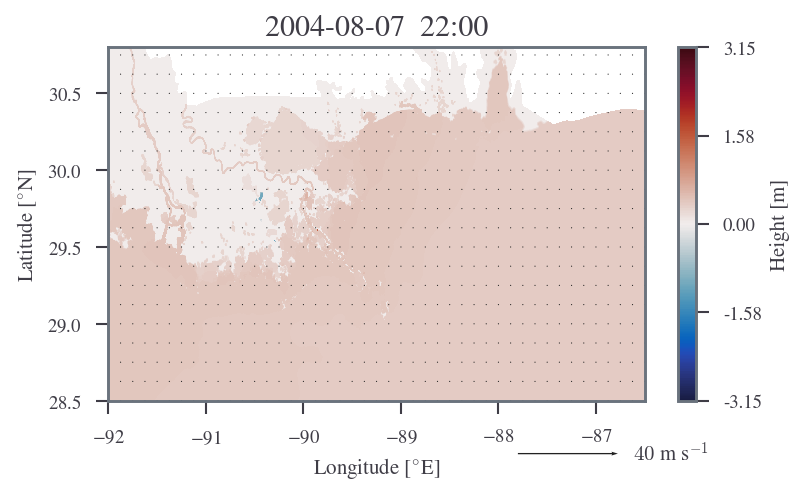

In [ ]:
plot_quiver_height("../../kat.nws13.2004", time_i=165)